# Header

In [1]:
from utils import *
import matplotlib.pyplot as plt

> For immune-related signature, we constructed the cytokine-related signature (to be suppressed) by overlapping the GO cytokine response gene set (GO:0034097) with the up-regulated genes (adjusted p value<0.05) from A549-ACE2 infected with high MOI of SARS-CoV-2 (328 genes) (GSE147507), with further selection of a final 17 genes at the 0.05 upper quantile of log2fold change. This 17 gene signature was used as the up-regulated gene input in CMap screening within the L1000 database, and the 275 compounds within A549 cell line with lowest connectivity scores (-100 ~ -90, showing strongest opposing effects) were selected.

# DEGs

## Immune

In [2]:
dat = pd.read_csv('../data/Anticytokine/DEGs/Blanco_Cellline.csv', index_col=0)
dat.head(3)

,SARS-CoV-1_L2FC,IAV_L2FC,MERS-CoV_L2FC,HPIV3_L2FC,RSV_L2FC,SARS-CoV-2(Calu-3)_L2FC,SARS-CoV-2(A549)_L2FC,SARS-CoV-2(A549-ACE2)LowMOI_L2FC,SARS-CoV-2(A549-ACE2)HiMOI_L2FC,SARS-CoV-2(A549-ACE2)-Ruxolitinib_L2FC,padj_SARS-CoV-1,padj_IAV,padj_MERS-CoV,padj_HPIV3,padj_RSV,padj_SARS-CoV-2(Calu-3),padj_SARS-CoV-2(A549),padj_SARS-CoV-2(A549-ACE2)LowMOI,padj_SARS-CoV-2(A549-ACE2)HiMOI,padj_SARS-CoV-2(A549-ACE2)-Ruxolitinib
GeneName,,,,,,,,,,,,,,,,,,,,
IFNL1,0.0,1.36970,0.00000,7.837988,7.142762,7.23990,0.0,0.0,5.077692,3.547628,1.0,1.0,1.0,2.620000e-68,4.510000e-44,2.530000e-139,1.0,0.0,1.000000e+00,1.0
IFNL2,0.0,1.37928,0.12531,6.843922,4.838329,7.87792,0.0,0.0,5.246026,1.947436,1.0,1.0,1.0,1.480000e-48,9.740000e-17,5.690000e-107,1.0,0.0,2.690000e-20,1.0
IFNL3,0.0,1.81542,0.00000,6.225043,4.827347,7.46801,0.0,0.0,5.045848,2.510746,1.0,1.0,1.0,3.660000e-35,3.190000e-16,5.510000e-102,1.0,0.0,2.370000e-18,1.0


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


(23710, 2)
(8382, 2)


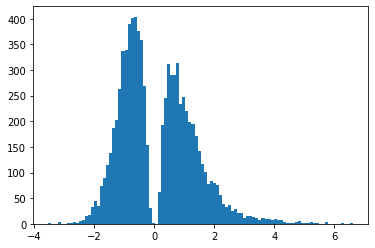

In [3]:
name = 'SARS-CoV-2(A549-ACE2)HiMOI'
df = dat[[f'{name}_L2FC',f'padj_{name}']]
df.rename( columns={f'{name}_L2FC':'L2FC', f'padj_{name}':'padj'}, inplace=True )
print(df.shape)

sel = df[df['padj']<0.05]
print(sel.shape)

_ = plt.hist(sel['L2FC'].values, bins=100)

# Gset

In [4]:
gset = read_gmt('../data/Anticytokine/geneset/c5.all.v6.2.symbols.gmt')
'go_response_to_cytokine' in gset 

s2 = gset['go_response_to_cytokine'] # GO:0034097, genes

cytokine_genes = list(set([g for g in sel.index if g in s2])) # up regulated cytokine genes after infection
print(f'{len(cytokine_genes)} down genes')

328 down genes


17 genes


,L2FC,padj
GeneName,,
EGR1,6.616562,1.810000e-192
IFNB1,5.755194,1.150000e-28
CXCL2,5.272651,0.000000e+00
NFKBIA,5.232026,0.000000e+00
SELE,4.854643,1.590000e-25
IL8,4.853548,0.000000e+00
IRF7,4.805055,2.690000e-97
IFITM1,4.576129,3.210000e-47
NFIL3,4.218157,7.750000e-267


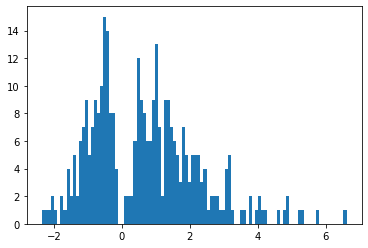

In [5]:
cytokine_deg = sel.loc[cytokine_genes,:]

_ = plt.hist(cytokine_deg['L2FC'].values, bins=100)

thres = .95
genes = cytokine_deg[cytokine_deg['L2FC']>np.quantile(cytokine_deg['L2FC'].values, thres)].index.tolist()
print(f'{len(genes)} genes')
cytokine_deg_fi = cytokine_deg.loc[genes,:].sort_values('L2FC', ascending=False)
cytokine_deg_fi

In [6]:
for g in cytokine_deg_fi.index:
    print(g)

EGR1
IFNB1
CXCL2
NFKBIA
SELE
IL8
IRF7
IFITM1
NFIL3
TNF
CXCL3
SOCS1
CD274
IL20RB
CCL20
CCR6
HLA-F


17 genes as cmap input

2 genes Valid but not used in query Valid HUGO symbol or Entrez ID not part of BING space, not used in query `CD274, IL20RB`

## Add protein name

In [7]:
# see https://www.uniprot.org/help/query-fields
import requests

prot_names = []
for g in cytokine_deg_fi.index:
    fullURL=f'https://www.uniprot.org/uniprot/?query=organism:9606+AND+gene_exact:{g}&sort=score&columns=protein names&format=tab'
    result = requests.get(fullURL)
    if result.ok and len(result.text)>0:
        tmp = sorted((result.text.split('\n')[1:]), key=len)[1].split('(')[0].strip()
    else:
        tmp = None
    prot_names.append(tmp)       

In [8]:
cytokine_deg_fi['Protein name'] = prot_names
cytokine_deg_fi = cytokine_deg_fi[['Protein name','L2FC','padj']].sort_values('L2FC', ascending=False)
cytokine_deg_fi

,Protein name,L2FC,padj
GeneName,,,
EGR1,Early growth response protein,6.616562,1.810000e-192
IFNB1,Interferon beta,5.755194,1.150000e-28
CXCL2,C-X-C motif chemokine,5.272651,0.000000e+00
NFKBIA,NF-kappa-B inhibitor alpha,5.232026,0.000000e+00
SELE,E-selectin,4.854643,1.590000e-25
IL8,Multifunctional fusion protein [Includes: Inte...,4.853548,0.000000e+00
IRF7,Interferon regulatory factor 7,4.805055,2.690000e-97
IFITM1,Interferon induced transmembrane protein 1,4.576129,3.210000e-47
NFIL3,Nuclear factor interleukin-3-regulated protein,4.218157,7.750000e-267


In [9]:
cytokine_deg_fi.to_excel('../data/Anticytokine/DEGs/degs.xlsx')

# Plot Log2FC

In [10]:
import seaborn as sns
import matplotlib as mpl


In [11]:
df_p = cytokine_deg_fi.iloc[:,[1]]
df_p.columns = ['log2FoldChange']
df_p['GeneName'] = df_p.index.tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


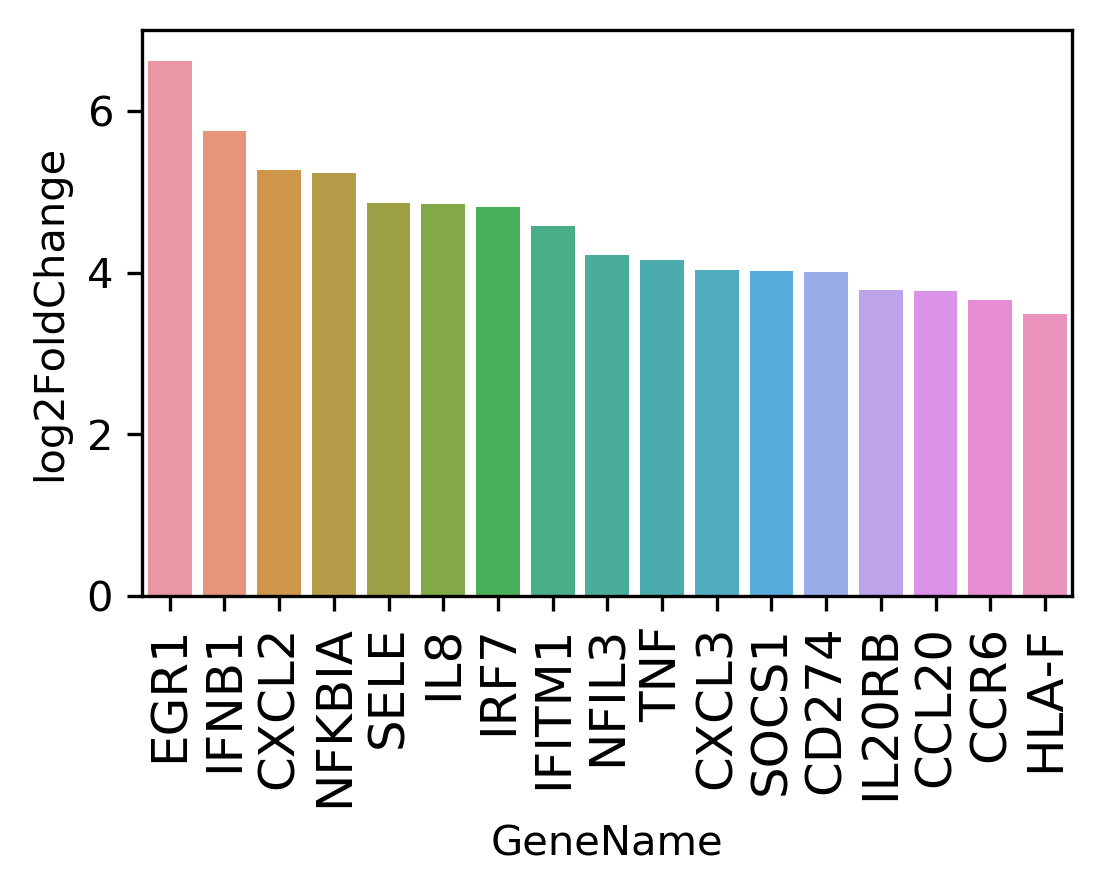

In [12]:

fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.barplot(y='log2FoldChange', x='GeneName',data=df_p, ax=ax)
mpl.rcParams['xtick.major.pad']='0'
mpl.rcParams['xtick.minor.pad']='0'
ax.set_xticklabels(df_p['GeneName'].values, rotation=90, fontsize=12)
ax.set_ylim([0,7])

plt.savefig('../figures/anticytokine_17genes_logFC.png', dpi=300, bbox_inches='tight')

# GO enrichment of 17 genes
Table S2B

In [13]:
cytokine_deg_fi.head(3)

,Protein name,L2FC,padj
GeneName,,,
EGR1,Early growth response protein,6.616562,1.810000e-192
IFNB1,Interferon beta,5.755194,1.150000e-28
CXCL2,C-X-C motif chemokine,5.272651,0.000000e+00


In [16]:
# 17 genes
#------ enr result
enr = pd.read_csv('../data/Anticytokine/gprofiler/gProfiler_hsapiens_intersections.csv')
print(enr.shape)

enr_sel = enr[(enr['source'].isin(['GO:BP'])) & (enr['adjusted_p_value']<0.05) & (enr['intersection_size']>=10) & (enr['term_size']<=1200)].reset_index(drop=True)

print(enr_sel.shape)

enr_sel.head(3)

(196, 10)
(4, 10)


,source,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections
0,GO:BP,cytokine-mediated signaling pathway,GO:0019221,1.195592e-13,12.922417,810,17,14,18017,"EGR1,IFNB1,CXCL2,NFKBIA,IL8,IRF7,IFITM1,TNF,CX..."
1,GO:BP,cellular response to cytokine stimulus,GO:0071345,1.934153e-13,12.713509,1143,17,15,18017,"EGR1,IFNB1,CXCL2,NFKBIA,IL8,IRF7,IFITM1,NFIL3,..."
2,GO:BP,regulation of response to external stimulus,GO:0032101,1.411812e-05,4.850223,1096,17,10,18017,"IFNB1,NFKBIA,SELE,IL8,IRF7,TNF,SOCS1,IL20RB,CC..."


In [17]:
cytokine_deg_fi

res = []

for i,g_i in enumerate(cytokine_deg_fi.values):
    
    g = cytokine_deg_fi.index[i]
    
    ct = 0
    for row in enr_sel.values:   
        if g in row[-1].split(','):
            tmp = np.hstack((i+1, g, g_i[:-1], row[:3])) # gindex from 1
            res.append(tmp)
            ct += 1
            
    if ct == 0:
        tmp = np.hstack((i+1, g, g_i[:-1], ['GO:BP'],['/']*2))
        res.append(tmp)
    
    print(g,ct)
    
res_df = pd.DataFrame(data=np.array(res), columns=['index','Gene name', 'Protein name','Log2 Fold Change', 'Database','Term','GO number'])

EGR1 2
IFNB1 4
CXCL2 2
NFKBIA 3
SELE 2
IL8 4
IRF7 4
IFITM1 2
NFIL3 1
TNF 4
CXCL3 2
SOCS1 4
CD274 1
IL20RB 3
CCL20 3
CCR6 4
HLA-F 4


In [18]:
res_df['idx'] = res_df.index
res_df = res_df.set_index(['index','Gene name', 'Protein name','Log2 Fold Change', 'Database','idx'])

print(res_df.shape)
res_df.head(20)

(49, 2)


Term  \
index Gene name Protein name                                       Log2 Fold Change Database idx                                                 
1     EGR1      Early growth response protein                      6.616562         GO:BP    0             cytokine-mediated signaling pathway   
                                                                                             1          cellular response to cytokine stimulus   
2     IFNB1     Interferon beta                                    5.755194         GO:BP    2             cytokine-mediated signaling pathway   
                                                                                             3          cellular response to cytokine stimulus   
                                                                                             4     regulation of response to external stimulus   
                                                                                             5    positive regulation of immune system process   
3     CXCL2     C-X-C motif chemokine                              5.272651         GO:BP    6             cytokine-mediated signaling pathway   
                                                                                             7          cellular response to cytokine stimulus   
4     NFKBIA    NF-kappa-B inhibitor alpha                         5.232026         GO:BP    8             cytokine-mediated signaling pathway   
                                                                                             9          cellular response to cytokine stimulus   
                                                                                             10    regulation of response to external stimulus   
5     SELE      E-selectin                                         4.854643         GO:BP    11    regulation of response to external stimulus   
                                                                                             12   positive regulation of immune system process   
6     IL8       Multifunctional fusion protein [Includes: Inter... 4.853548         GO:BP    13            cytokine-mediated signaling pathway   
                                                                                             14         cellular response to cytokine stimulus   
                                                                                             15    regulation of response to external stimulus   
                                                                                             16   positive regulation of immune system process   
7     IRF7      Interferon regulatory factor 7                     4.805055         GO:BP    17            cytokine-mediated signaling pathway   
                                                                                             18         cellular response to cytokine stimulus   
                                                                                             19    regulation of response to external stimulus   

                                                                                                   GO number  
index Gene name Protein name                                       Log2 Fold Change Database idx              
1     EGR1      Early growth response protein                      6.616562         GO:BP    0    GO:0019221  
                                                                                             1    GO:0071345  
2     IFNB1     Interferon beta                                    5.755194         GO:BP    2    GO:0019221  
                                                                                             3    GO:0071345  
                                                                                             4    GO:0032101  
                                                                                             5    GO:0002684  
3     CXCL2     C-X-C motif chemokine

In [19]:
res_df.to_excel('../data/Anticytokine/geneset/17Signatures_GOBP.xlsx')